In [16]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [4]:
df.isnull().sum()


BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [5]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

<AxesSubplot:>

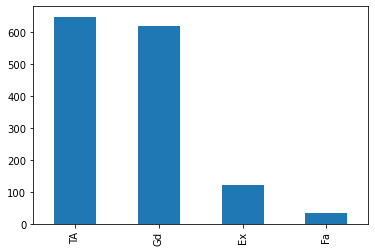

In [6]:
df['BsmtQual'].value_counts().plot.bar()

<AxesSubplot:>

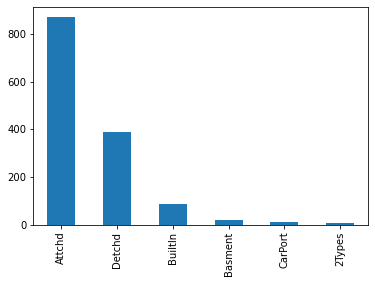

In [7]:
df['GarageType'].value_counts().plot.bar()

In [9]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [10]:
df['GarageType'].mode()[0]

'Attchd'

<AxesSubplot:>

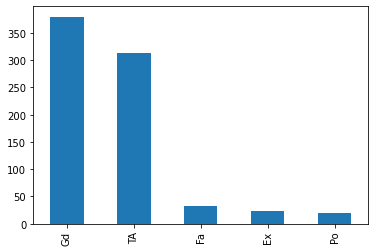

In [8]:
df['FireplaceQu'].value_counts().plot.bar()

In [11]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [12]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [13]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

### Advantages
* Easy To implement
*  Fater way to implement
#### Disadvantages
* since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
    * It distorts the relation of the most frequent label

### Adding a variable to capture NAN


In [14]:
df_add =pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [17]:
df_add['BsmtQual_Var']=np.where(df_add['BsmtQual'].isnull(),1,0)

In [18]:
frequent_Bsmt = df_add['BsmtQual'].mode()[0]

In [20]:
df_add['BsmtQual'].fillna(frequent_Bsmt,inplace=True)
df_add.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [23]:
df_add['FireplaceQu_Var']=np.where(df_add['FireplaceQu'].isnull(),1,0)

In [24]:
frequent_fire =df_add['FireplaceQu'].mode()[0]
df_add['FireplaceQu'].fillna(frequent_fire,inplace=True)

In [25]:
df_add.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


### Suppose if you have more frequent categories, we just replace NAN with a new category

In [26]:
df_MoreFreq =pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df_MoreFreq.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [27]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [28]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df_MoreFreq,feature)

In [29]:
df_MoreFreq.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [30]:
df_MoreFreq = df_MoreFreq.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)
df_MoreFreq.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


# One Hot Encoding

In [44]:
df_titanic = pd.read_csv('titanic.csv', usecols=['Sex','Embarked'])

In [45]:
df_titanic.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [46]:
print(df_titanic['Sex'].unique())
print('\nEmbarked unique values:', df_titanic['Embarked'].unique())

['male' 'female']

Embarked unique values: ['S' 'C' 'Q' nan]


In [47]:
df_titanic.dropna(inplace=True)

In [48]:
pd.get_dummies(df_titanic, drop_first=True).head(10)


,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
5,1,1,0
6,1,0,1
7,1,0,1
8,0,0,1
9,0,0,0


In [49]:
df_titanic.head(10)

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
5,male,Q
6,male,S
7,male,S
8,female,S
9,female,C


#### Onehotencoding with many categories in a feature


In [51]:
df_mer = pd.read_csv('mercedes.csv',usecols=["X0","X1","X2","X3","X4","X5","X6"])

In [55]:
df_mer['X1'].name

'X1'

In [56]:
for i in df_mer.columns:
    print(df_mer[i].name, ':', len(df[i].unique()))

X0 : 47
X1 : 27
X2 : 44
X3 : 7
X4 : 4
X5 : 29
X6 : 12


In [59]:
df_mer.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [60]:
lst_10=df_mer.X1.value_counts().sort_values(ascending=False).head(10).index
lst_10=list(lst_10)

In [61]:
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [63]:
df_mer.tail()

,X0,X1,X2,X3,X4,X5,X6
4204,ak,s,as,c,d,aa,d
4205,j,o,t,d,d,aa,h
4206,ak,v,r,a,d,aa,g
4207,al,r,e,f,d,aa,l
4208,z,r,ae,c,d,aa,g


In [65]:
for categories in lst_10:
    df_mer[categories]=np.where(df_mer['X1']==categories,1,0)

In [66]:
df_mer.tail()

,X0,X1,X2,X3,X4,X5,X6,aa,s,b,l,v,r,i,a,c,o
4204,ak,s,as,c,d,aa,d,0,1,0,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,0,0,0,0,0,0,0,0,0,1
4206,ak,v,r,a,d,aa,g,0,0,0,0,1,0,0,0,0,0
4207,al,r,e,f,d,aa,l,0,0,0,0,0,1,0,0,0,0
4208,z,r,ae,c,d,aa,g,0,0,0,0,0,1,0,0,0,0


In [67]:
lst_10.append('X1')

In [68]:
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o', 'X1']

In [69]:
df_mer[lst_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r


In [70]:
df_mer.tail()

,X0,X1,X2,X3,X4,X5,X6,aa,s,b,l,v,r,i,a,c,o
4204,ak,s,as,c,d,aa,d,0,1,0,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,0,0,0,0,0,0,0,0,0,1
4206,ak,v,r,a,d,aa,g,0,0,0,0,1,0,0,0,0,0
4207,al,r,e,f,d,aa,l,0,0,0,0,0,1,0,0,0,0
4208,z,r,ae,c,d,aa,g,0,0,0,0,0,1,0,0,0,0


# Ordinal Number Encoding


In [71]:
import datetime

today_date=datetime.datetime.today()
today_date

datetime.datetime(2022, 1, 25, 17, 58, 11, 495141)

In [72]:
today_date-datetime.timedelta(3)

datetime.datetime(2022, 1, 22, 17, 58, 11, 495141)

In [73]:
#### List Comprehension
days=[today_date-datetime.timedelta(x) for x in range(0,15)]

In [74]:
data=pd.DataFrame(days)
data.columns=["Day"]
data.head()

,Day
0,2022-01-25 17:58:11.495141
1,2022-01-24 17:58:11.495141
2,2022-01-23 17:58:11.495141
3,2022-01-22 17:58:11.495141
4,2022-01-21 17:58:11.495141


In [85]:
pd.to_datetime(data['Day']).dt.day_name()

0       Tuesday
1        Monday
2        Sunday
3      Saturday
4        Friday
5      Thursday
6     Wednesday
7       Tuesday
8        Monday
9        Sunday
10     Saturday
11       Friday
12     Thursday
13    Wednesday
14      Tuesday
Name: Day, dtype: object

In [86]:
data['weekday']=data['Day'].dt.day_name()
data.head()

,Day,weekday
0,2022-01-25 17:58:11.495141,Tuesday
1,2022-01-24 17:58:11.495141,Monday
2,2022-01-23 17:58:11.495141,Sunday
3,2022-01-22 17:58:11.495141,Saturday
4,2022-01-21 17:58:11.495141,Friday


In [87]:
dictionary={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
dictionary

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [88]:
data['weekday_ordinal']=data['weekday'].map(dictionary)
data.head()

,Day,weekday,weekday_ordinal
0,2022-01-25 17:58:11.495141,Tuesday,2
1,2022-01-24 17:58:11.495141,Monday,1
2,2022-01-23 17:58:11.495141,Sunday,7
3,2022-01-22 17:58:11.495141,Saturday,6
4,2022-01-21 17:58:11.495141,Friday,5


### Count Or Frequency Encoding
    

In [89]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [90]:
columns=[1,3,5,6,7,8,9,13]


In [91]:
train_set=train_set[columns]


In [92]:
train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [93]:
for feature in train_set.columns[:]:
    print(feature,":",len(train_set[feature].unique()),'labels')

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [96]:
train_set['Country'].value_counts().head(10)

 United-States    29170
 Mexico             643
 ?                  583
 Philippines        198
 Germany            137
 Canada             121
 Puerto-Rico        114
 El-Salvador        106
 India              100
 Cuba                95
Name: Country, dtype: int64

In [94]:
country_map=train_set['Country'].value_counts().to_dict()
country_map

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' France': 29,
 ' Greece': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Cambodia': 19,
 ' Trinadad&Tobago': 19,
 ' Laos': 18,
 ' Thailand': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Hungary': 13,
 ' Honduras': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [97]:
train_set['Country']=train_set['Country'].map(country_map)
train_set.head(20)

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,29170
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,81
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,29170
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170


#### Advantages
* Easy To Use
* Not increasing feature space 
##### Disadvantages
* It will provide same weight if the frequencies are same

## Target Guided Ordinal Encoding
1. Ordering the labels according to the target
2. Replace the labels by the joint probability of being 1 or 0

In [98]:
df_tit =pd.read_csv('titanic.csv', usecols=['Cabin','Survived'])
df_tit.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [99]:
df_tit['Cabin'].fillna('Missing',inplace=True)


In [101]:
df_tit['Cabin']=df_tit['Cabin'].astype(str).str[0]

In [102]:
df_tit.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [103]:
df_tit.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [104]:
df_tit.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [109]:
df_tit.Cabin.value_counts()/len(df_tit)

M    0.771044
C    0.066218
B    0.052750
D    0.037037
E    0.035915
A    0.016835
F    0.014590
G    0.004489
T    0.001122
Name: Cabin, dtype: float64

In [110]:
df_tit.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [114]:
ordinal_labels = df_tit.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [117]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [118]:
df_tit['Cabin_ordinal_labels'] = df_tit['Cabin'].map(ordinal_labels2)
df_tit.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


### Mean Encoding


In [120]:
mean_ordinal=df_tit.groupby(['Cabin'])['Survived'].mean().to_dict()
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [122]:
df_tit['mean_ordinal_encode']=df_tit['Cabin'].map(mean_ordinal)
df_tit.head()

,Survived,Cabin,Cabin_ordinal_labels,mean_ordinal_encode
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854
